<a href="https://colab.research.google.com/github/chain-veerender/veerender/blob/master/AgenticAI_Intro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Lets start with simple LLM AI Agent and fundamental structure**

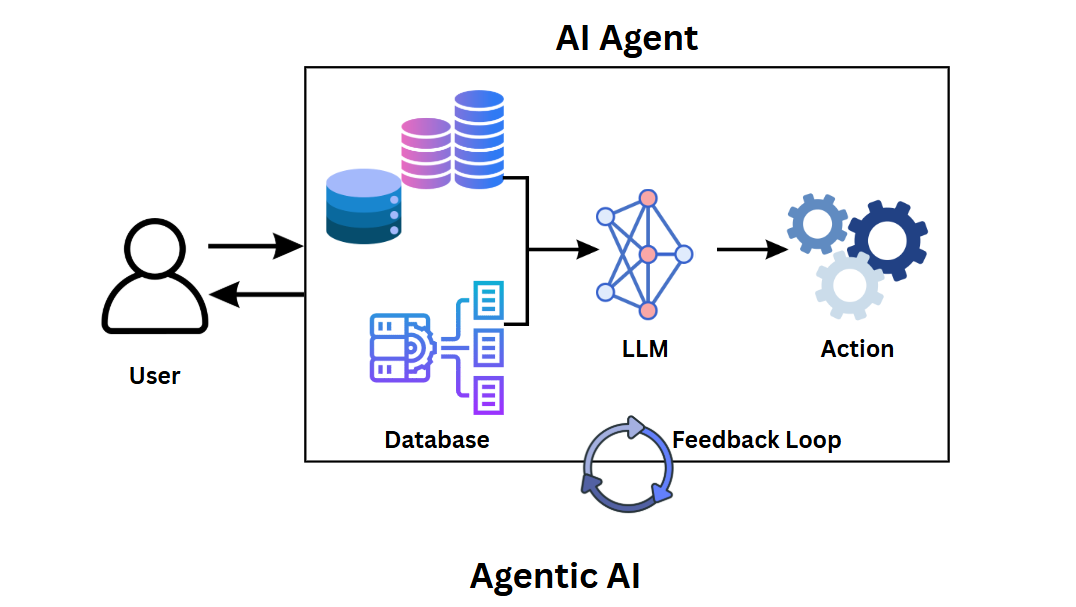

Image Credits: https://www.codecademy.com/article/agentic-ai-with-langchain-langgraph

In [43]:
!pip install openai langgraph langgraph-supervisor langchain-openai pydantic langsmith tracing pygraphviz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.0/106.0 kB 3.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  error: subprocess-exited-with-error
  
  × Building wheel for pygraphviz (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for pygraphviz
Failed to build pygraphviz
ERROR: ERROR: Failed to build installable wheels for some pyproject.toml based projects (pygraphviz)


**Setup and LLM Integration**

In [14]:
import os
from openai import OpenAI
# Load API key from Colab Secrets
from google.colab import userdata
from getpass import getpass
import os
## Replace here with your personal or enterprise openai secret key
OPENAI_API_KEY = userdata.get("veer_openai_key")
# Initialize the OpenAI client with your API key
client = OpenAI(api_key=OPENAI_API_KEY)

## Replace here with your personal or enterprise langsmith secret key
os.environ["LANGCHAIN_API_KEY"] = userdata.get("veer_langsmith_key")
os.environ["LANGCHAIN_TRACING_V2"] = "true"

**Agents core logic**

In [ ]:
class SimpleFactAgent:

      def simple_llm_call(prompt):
        try:
          response = client.chat.completions.create(
          model="gpt-4o-mini",
          messages=[
                {"role": "system", "content": "You are a helpful AI assistant."},
                {"role": "user", "content": prompt}
                  ],
          max_tokens=150,
          temperature=0.7,
          )
          return response.choices[0].message.content.strip()
        except Exception as e:
          return f"An error occurred: {e}"


**Agent Interaction**

In [ ]:
if __name__ == "__main__":
    # Create an instance of the agent
    fact_agent = SimpleFactAgent

    while True:
        user_input = input("Ask a question (or type 'exit' to quit): ")
        if user_input.lower() == 'exit':
            break

        # Get the answer from the agent
        answer = fact_agent.simple_llm_call(user_input)
        print(f"Agent says: {answer}")

Ask a question (or type 'exit' to quit): what is capital of italy
Agent says: The capital of Italy is Rome.
Ask a question (or type 'exit' to quit): describe agents as class in programming
Agent says: In programming, especially in the context of object-oriented programming (OOP), the concept of "agents" can be modeled as a class. An agent can be thought of as an entity that can perceive its environment, make decisions based on its perceptions, and take actions to achieve its goals. 

Here’s a breakdown of how you might define an `Agent` class in programming:

### Basic Structure of an Agent Class

1. **Attributes**: These are properties that define the state of the agent. For example:
   - `id`: A unique identifier for the agent.
   - `location`: The current position of the agent in its environment.
   - `knowledge`: Information the agent has about the environment.
   - `goals`:
Ask a question (or type 'exit' to quit): exit


**AI Agents as Objects:**


An AI agent, in a programming context, can be conceptualized and implemented as an object.

This object encapsulates the agent's state (its internal data, beliefs, and goals) and its behavior (the actions it can perform and the decisions it makes).

For example, a customer support AI agent might be an object with attributes like customer_id, query_history, and methods like respond_to_query() or search_knowledge_base().

**Classes as foundation for AI Agents**

Classes serve as the blueprints or templates for creating these AI agent objects.

A class defines the common structure and behavior that all instances of a particular type of AI agent will share.

For instance, a LearningAgent class could define the attributes and methods common to all learning agents, such as learning_element, problem_generator, and refine_performance().

This allows for the creation of multiple AI agent instances, each with its own specific state, but all adhering to the defined structure and capabilities of the class.

**Benefits of Using Classes for AI Agents:**

**Modularity and Reusability:**
Classes promote modular design, allowing developers to create distinct, reusable components for different types of AI agents.

**Encapsulation:**
They encapsulate the internal workings of an agent, presenting a clear interface for interaction while hiding implementation details.

**Inheritance and Polymorphism:**
OOP features like inheritance allow for the creation of specialized AI agent types (e.g., a SimpleReflexAgent inheriting from a more general AIAgent class), while polymorphism enables agents of different types to be treated uniformly.

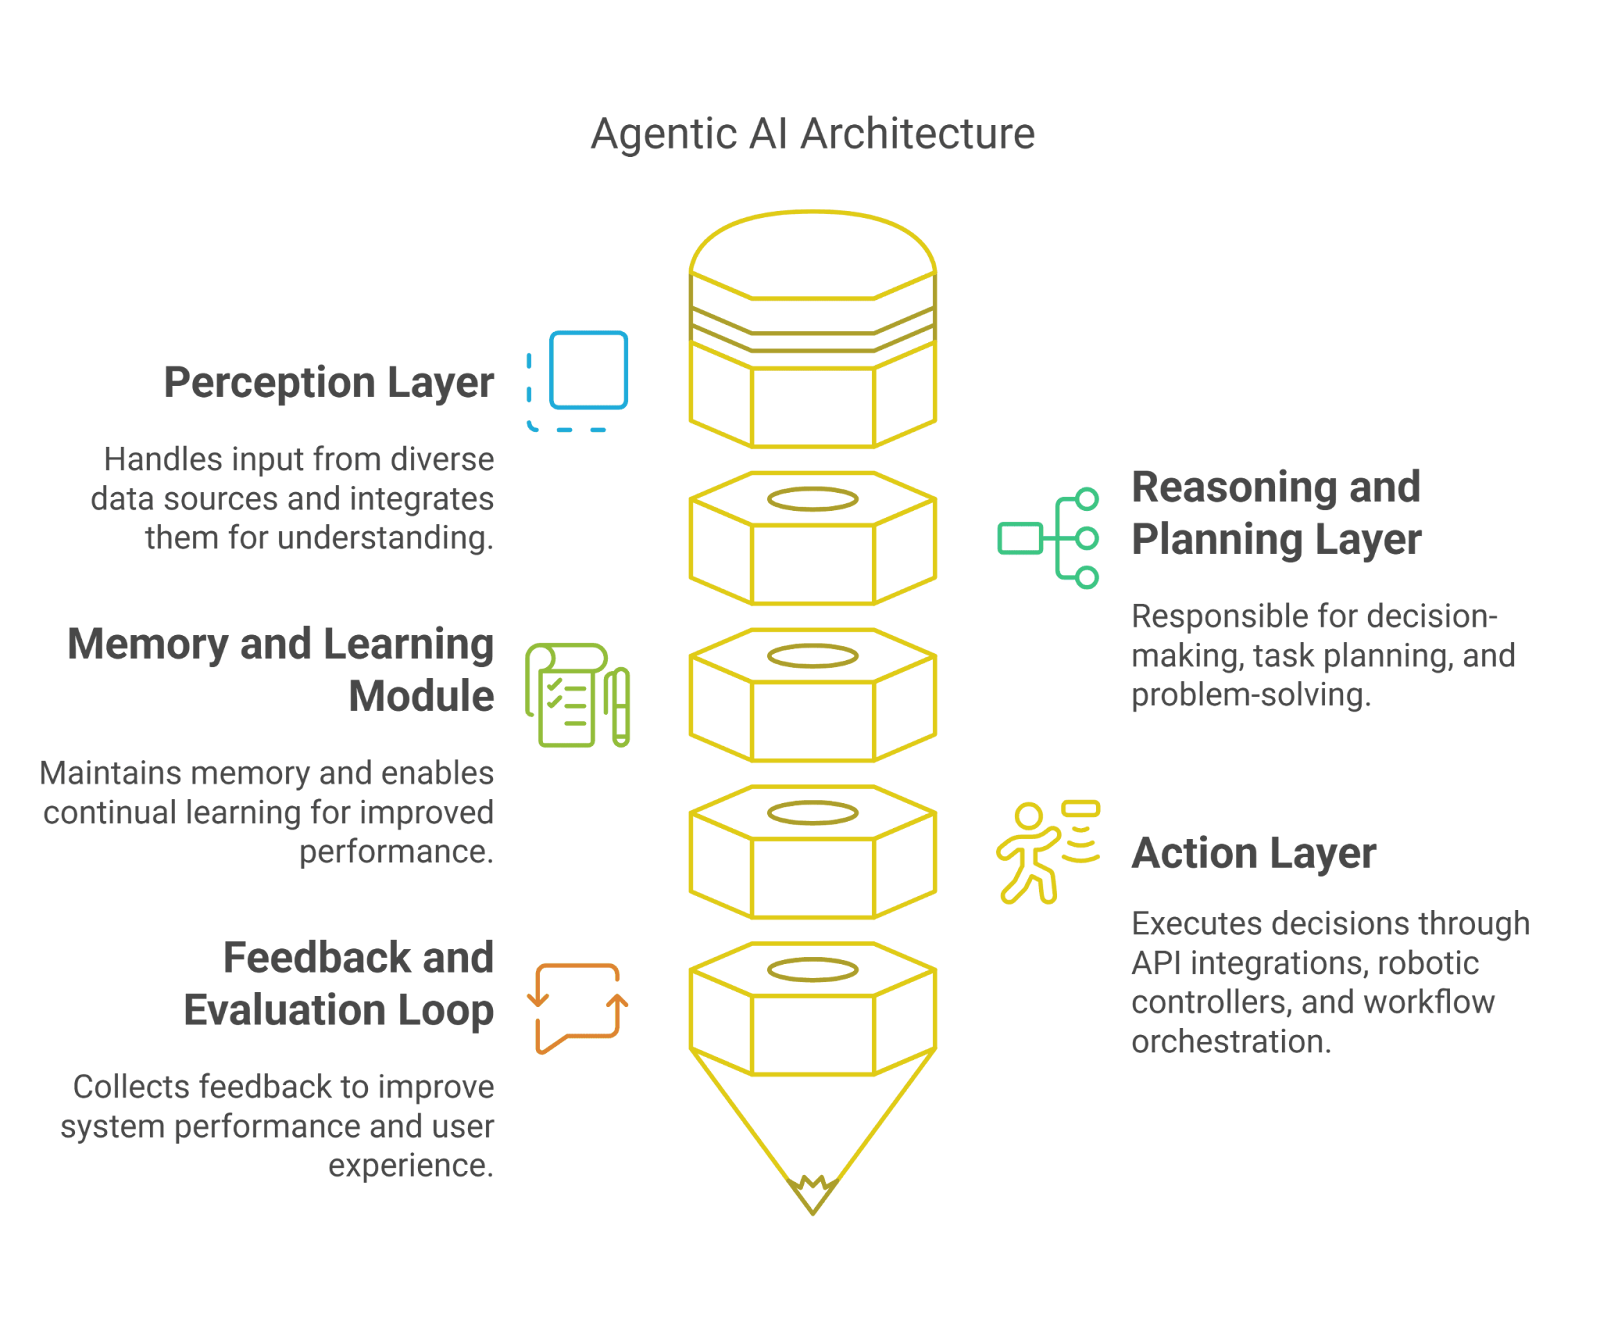

Image Credits: https://www.ema.co/additional-blogs/addition-blogs/future-of-agentic-ai-systems-opportunities-challenges-and-practical-guidelines

**Drill down - Interactive Learning in Agentic AI**

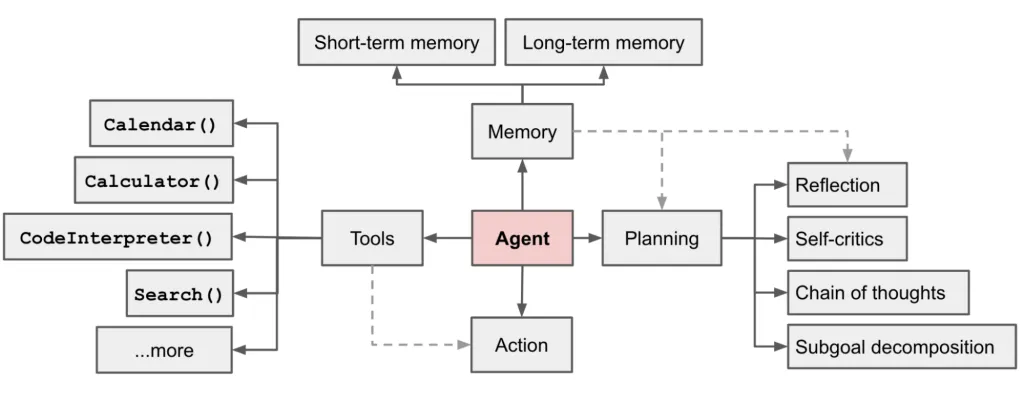

Image credits: https://helabenkhalfallah.com/2025/07/22/cognition-autonomy-and-interaction-in-agentic-ai-systems/

**Core Components of Agentic AI Architecture:**

**Perception:**
The ability to gather information from the environment (e.g., text, images, sensor data).

**Reasoning/Planning:**
The capacity to process perceived information, understand the context, formulate plans, and make decisions. This often involves LLMs.

**Action:**
The capability to execute the planned actions in the environment, which could involve interacting with other systems or generating text

**Memory:**
The ability to store and recall past experiences, observations, and learned knowledge to inform future decisions and actions.

**Learning/Reflection:**
The mechanism for the agent to refine its strategies, improve its performance, and adapt to new situations based on feedback and outcomes.

**Lets build customer support triage  Agent (Mock)**

**Process flow:**
kb(Knowledge base) search -> Route Ticket (production, issue type, severity) -> create ticket(title, description, customer, severity, product, labels):mock JSON ticket -> notify_pager(severity, message): mock escalation log

**Agent outcome expectation:** once we feed a payments-outage email -->  agent will search memory/KB, route, create a ticket, (optionally) escalate, and draft a customer reply.

In [ ]:
from __future__ import annotations


import os
import json
import time
import math
import base64
import sqlite3
import threading
from dataclasses import dataclass, field
from typing import Any, Dict, List, Callable, Optional, Tuple


import numpy as np
from openai import OpenAI

In [ ]:
# ------------------------------
# Configuration
# ------------------------------
OPENAI_MODEL = os.getenv("OPENAI_MODEL", "gpt-4o")
EMBED_MODEL = os.getenv("OPENAI_EMBED_MODEL", "text-embedding-3-small")
DB_PATH = os.getenv("AGENT_MEMORY_DB", "agent_memory.db")


#client = OpenAI()  ## Not required already executed in first cell setup and LLM


# ------------------------------
# Utility: embeddings & similarity
# ------------------------------
def embed_text(text: str) -> List[float]:
  """Get an embedding vector for text."""
  # You can cache these in production.
  resp = client.embeddings.create(model=EMBED_MODEL, input=text)
  return resp.data[0].embedding




def cosine_sim(a: np.ndarray, b: np.ndarray) -> float:
  denom = (np.linalg.norm(a) * np.linalg.norm(b))
  if denom == 0:
    return 0.0
  return float(np.dot(a, b) / denom)

In [ ]:
# ------------------------------
# Memory: SQLite + vectors
# ------------------------------
class VectorMemory:
    """Simple vector-ish memory with SQLite backing and cosine similarity search."""

    def __init__(self, path: str = DB_PATH):
        self.path = path
        self._init_db()
        self._lock = threading.Lock()

    def _init_db(self):
        con = sqlite3.connect(self.path)
        cur = con.cursor()
        cur.execute(
            """
            CREATE TABLE IF NOT EXISTS memory (
                id INTEGER PRIMARY KEY AUTOINCREMENT,
                kind TEXT, -- observation|plan|action|reflection|note
                content TEXT,
                metadata TEXT,
                vector BLOB, -- np.float32 bytes
                created_at REAL
            )
            """
        )
        con.commit()
        con.close()

    def add(self, kind: str, content: str, metadata: Optional[Dict[str, Any]] = None):
        vec = np.array(embed_text(content), dtype=np.float32)
        blob = vec.tobytes()
        meta = json.dumps(metadata or {})
        with self._lock, sqlite3.connect(self.path) as con:
            con.execute(
                "INSERT INTO memory(kind, content, metadata, vector, created_at) VALUES (?, ?, ?, ?, ?)",
                (kind, content, meta, blob, time.time()),
            )

    def search(self, query: str, k: int = 5, kind: Optional[str] = None) -> List[Dict[str, Any]]:
        qv = np.array(embed_text(query), dtype=np.float32)
        with sqlite3.connect(self.path) as con:
            cur = con.cursor()
            if kind:
                cur.execute("SELECT id, kind, content, metadata, vector, created_at FROM memory WHERE kind = ?", (kind,))
            else:
                cur.execute("SELECT id, kind, content, metadata, vector, created_at FROM memory")
            rows = cur.fetchall()
            scored: List[Tuple[float, Dict[str, Any]]] = []
            for (id_, kind_, content, meta, vec_blob, ts) in rows:
                vec = np.frombuffer(vec_blob, dtype=np.float32)
                score = cosine_sim(qv, vec)
                scored.append((score, {
                    "id": id_, "kind": kind_, "content": content,
                    "metadata": json.loads(meta or '{}'), "created_at": ts
                }))
            scored.sort(key=lambda x: x[0], reverse=True)
            return [it for _, it in scored[:k]]

In [ ]:
# ------------------------------
# Perception: multimodal input normalization
# ------------------------------
@dataclass
class Perception:
    """Collect & normalize inputs as a multimodal message list for Chat Completions."""
    texts: List[str] = field(default_factory=list)
    image_urls: List[str] = field(default_factory=list)
    image_base64: List[str] = field(default_factory=list)
    sensors: Dict[str, Any] = field(default_factory=dict) # arbitrary sensor data


    def to_message_content(self) -> List[Dict[str, Any]]:
        content: List[Dict[str, Any]] = []
        for t in self.texts:
            content.append({"type": "text", "text": t})
        for url in self.image_urls:
            content.append({"type": "image_url", "image_url": {"url": url}})
        for b64 in self.image_base64:
            content.append({
                "type": "image_url",
                "image_url": {"url": f"data:image/png;base64,{b64}"}
            })
        if self.sensors:
            content.append({"type": "text", "text": f"[SENSORS]{json.dumps(self.sensors)}"})
        return content

In [ ]:
# ------------------------------
# Tooling: define callable actions (the LLM can call these via function-calling)
# ------------------------------
ToolFn = Callable[[Dict[str, Any]], Dict[str, Any]]


class ToolRegistry:
    """Manages callable tools for the agent."""
    def __init__(self):
        self.tools: Dict[str, Tuple[Dict[str, Any], ToolFn]] = {}


    def register(self, name: str, description: str, parameters: Dict[str, Any], fn: ToolFn):
        schema = {
            "type": "function",
            "function": {
                "name": name,
                "description": description,
                "parameters": parameters,
            },
        }
        self.tools[name] = (schema, fn)


    def tool_specs(self) -> List[Dict[str, Any]]:
        return [spec for (spec, _fn) in self.tools.values()]


    def call(self, name: str, arguments_json: str) -> Dict[str, Any]:
        _spec, fn = self.tools[name]
        args = json.loads(arguments_json or "{}")
        return fn(args)




# Example tools (safe, local)
registry = ToolRegistry()

In [ ]:
def tool_write_file(args: Dict[str, Any]) -> Dict[str, Any]:
    path = args.get("path")
    content = args.get("content")
    if not path or not content:
        return {"ok": False, "error": "missing path or content"}
    os.makedirs(os.path.dirname(path) or ".", exist_ok=True)
    with open(path, "w", encoding="utf-8") as f:
        f.write(content)
    return {"ok": True, "path": path, "bytes": len(content.encode("utf-8"))}




registry.register(
    name="write_file",
    description="Write content to a local file (UTF-8).",
    parameters={
        "type": "object",
        "properties": {
            "path": {"type": "string", "description": "Where to write (relative or absolute)"},
            "content": {"type": "string", "description": "Text to write"},
        },
        "required": ["path", "content"],
        "additionalProperties": False,
    },
    fn=tool_write_file,
)


# Assuming agent_memory is an instance of VectorMemory
agent_memory = VectorMemory() # Instantiate VectorMemory


def tool_search_memory(args: Dict[str, Any]) -> Dict[str, Any]:
    query = args.get("query", "")
    k = int(args.get("k", 5))
    results = agent_memory.search(query, k=k)
    return {"ok": True, "results": results}




registry.register(
    name="search_memory",
    description="Search the agent's long-term memory by semantic similarity.",
    parameters={
        "type": "object",
        "properties": {
            "query": {"type": "string"},
            "k": {"type": "integer", "minimum": 1, "maximum": 20, "default": 5},
        },
        "required": ["query"],
    },
    fn=tool_search_memory,
)

In [ ]:
# ------------------------------
# Customer Support Triage: domain tools
# ------------------------------


def tool_route_ticket(args: Dict[str, Any]) -> Dict[str, Any]:
    """Decide target queue/assignee group based on product, issue type, and severity."""
    product = (args.get("product") or "generic").lower()
    issue_type = (args.get("issue_type") or "general").lower()
    severity = (args.get("severity") or "low").lower()
    # Simple routing rules; replace with your own mapping/CRM integration
    if severity in {"sev-0", "sev-1", "critical", "high"}:
        queue = "oncall-incident-response"
    elif product in {"billing", "payments"}:
        queue = "billing-support"
    elif issue_type in {"bug", "defect", "outage"}:
        queue = "engineering-l1"
    else:
        queue = "customer-success"
    return {"ok": True, "queue": queue, "product": product, "issue_type": issue_type, "severity": severity}

registry.register(
    name="route_ticket",
    description="Route a ticket to the best queue based on product/issue/severity.",
    parameters={
        "type": "object",
        "properties": {
            "product": {"type": "string"},
            "issue_type": {"type": "string"},
            "severity": {"type": "string", "description": "sev-0|sev-1|high|medium|low"},
        },
        "required": ["product", "issue_type", "severity"],
    },
    fn=tool_route_ticket,
)

def tool_create_ticket(args: Dict[str, Any]) -> Dict[str, Any]:
    """Create a ticket in a mock system (writes JSON to ./out/tickets/...). Replace with API call."""
    os.makedirs("./out/tickets", exist_ok=True)
    ticket = {
        "title": args.get("title", "Untitled"),
        "description": args.get("description", ""),
        "customer": args.get("customer", "unknown"),
        "severity": args.get("severity", "low"),
        "product": args.get("product", "generic"),
        "labels": args.get("labels", []),
        "created_at": time.time(),
    }
    path = f"./out/tickets/{int(ticket['created_at'])}.json"
    with open(path, "w", encoding="utf-8") as f:
        json.dump(ticket, f, indent=2)
    return {"ok": True, "path": path, "ticket": ticket}

registry.register(
    name="create_ticket",
    description="Create a support ticket (mock).",
    parameters={
        "type": "object",
        "properties": {
            "title": {"type": "string"},
            "description": {"type": "string"},
            "customer": {"type": "string"},
            "severity": {"type": "string"},
            "product": {"type": "string"},
            "labels": {"type": "array", "items": {"type": "string"}},
        },
        "required": ["title", "description", "customer", "severity", "product"],
    },
    fn=tool_create_ticket,
)

def tool_kb_search(args: Dict[str, Any]) -> Dict[str, Any]:
    """Search local KB via memory (semantic). In production, call your KB/ES/Vector DB."""
    query = args.get("query", "")
    k = int(args.get("k", 5))
    results = agent_memory.search(query, k=k, kind=None)
    return {"ok": True, "hits": results}




registry.register(
    name="kb_search",
    description="Search support knowledge base (semantic).",
    parameters={
        "type": "object",
        "properties": {"query": {"type": "string"}, "k": {"type": "integer", "default": 5}},
        "required": ["query"],
    },
    fn=tool_kb_search,
)

def tool_notify_pager(args: Dict[str, Any]) -> Dict[str, Any]:
    """Escalation notifier (mock). In production, call PagerDuty/Slack/etc."""
    sev = args.get("severity", "high")
    msg = args.get("message", "")
    path = "./out/escalations.log"
    os.makedirs("./out", exist_ok=True)
    with open(path, "a", encoding="utf-8") as f:
        f.write(f"{time.time()} | {sev.upper()} | {msg}\n")
    return {"ok": True, "path": path}




registry.register(
    name="notify_pager",
    description="Notify on-call (mock).",
    parameters={
        "type": "object",
        "properties": {"severity": {"type": "string"}, "message": {"type": "string"}},
        "required": ["severity", "message"],
    },
    fn=tool_notify_pager,
)

In [ ]:
# ------------------------------
# Reasoning & Planning: LLM loop with tool use
# ------------------------------
SYSTEM_PROMPT = """
You are a Customer Support Triage Agent that plans before acting. Always:

1) Extract key entities: customer, product, issue type, impact, environment.

2) Assess severity using clear rules (sev-0 critical outage → immediate).

3) Search KB/memory for similar cases & known fixes.

4) Propose a short plan (bullets): classify, route, create ticket, draft reply.

5) Call tools to execute (kb_search, route_ticket, create_ticket, notify_pager, write_file).

6) Output: {classification, severity, route, ticket_ref, suggested_reply}.
"""

@dataclass
class Agent:
    memory: VectorMemory
    tools: ToolRegistry
    model: str = OPENAI_MODEL


    def chat(self, perception: Perception, context_notes: Optional[str] = None) -> Dict[str, Any]:
        """Single turn: perceive -> reason/plan -> act (via tools) -> summarize."""
        user_content = perception.to_message_content()


        # Retrieve top memory snippets to ground the model
        mem_hits = self.memory.search(" ".join(perception.texts)[:2000], k=3)
        mem_text = "\n".join(f"[{m['kind']}] {m['content']}" for m in mem_hits)


        messages = [
            {"role": "system", "content": SYSTEM_PROMPT},
            {"role": "system", "content": f"Context notes: {context_notes or 'N/A'}"},
            {"role": "system", "content": f"Relevant memory (top-3):\n{mem_text or 'None'}"},
            {"role": "user", "content": user_content},
        ]

        # Core plan/act step: let the model decide to call tools.
        resp = client.chat.completions.create(
            model=self.model,
            messages=messages,
            tools=self.tools.tool_specs(),
            tool_choice="auto",
            temperature=0.2,
        )


        out_messages: List[Dict[str, Any]] = []
        final_text_parts: List[str] = []
        tool_results: List[Dict[str, Any]] = []


        choice = resp.choices[0]
        msg = choice.message
        out_messages.append(msg.dict())

        # If the model decided to call tools, execute them and return results to the model once
        if msg.tool_calls:
            for call in msg.tool_calls:
                name = call.function.name
                args_json = call.function.arguments
                result = self.tools.call(name, args_json)
                tool_results.append({"name": name, "result": result})


            tool_messages = [
                {"role": "tool", "tool_call_id": call.id, "name": call.function.name, "content": json.dumps(tool_results[i]["result"])}
                for i, call in enumerate(msg.tool_calls)
            ]

            # Follow-up completion with tool outputs for the final answer
            follow = client.chat.completions.create(
                model=self.model,
                messages=messages + [msg.dict()] + tool_messages,
                temperature=0.2,
            )
            final_text = follow.choices[0].message.content or ""
            final_text_parts.append(final_text)
            out_messages.append(follow.choices[0].message.dict())
        else:
            final_text_parts.append(msg.content or "")


        final_text = "\n".join([p for p in final_text_parts if p])

        # Store observation & outcome in memory
        obs_text = "\n".join(t for t in perception.texts)
        self.memory.add("observation", obs_text)
        if tool_results:
            self.memory.add("action", json.dumps(tool_results))
        if final_text:
            self.memory.add("plan", final_text[:2000])

        # Reflection step: ask the model for a brief lesson learned
        reflection = self.reflect(goal=obs_text, outcome=final_text)
        if reflection:
            self.memory.add("reflection", reflection)


        return {
            "messages": out_messages,
            "tool_results": tool_results,
            "answer": final_text,
            "reflection": reflection,
        }

    def reflect(self, goal: str, outcome: str) -> str:
        prompt = (
            "In 2-3 sentences, write one lesson learned to improve next time. "
            "Be concrete and actionable."
        )
        resp = client.chat.completions.create(
            model=self.model,
            messages=[
                {"role": "system", "content": "You are a terse reflection assistant."},
                {"role": "user", "content": f"Goal: {goal}\nOutcome: {outcome}\n{prompt}"},
            ],
            temperature=0.2,
        )
        return (resp.choices[0].message.content or "").strip()

In [ ]:
# ------------------------------
# Wiring it up
# ------------------------------
agent_memory = VectorMemory(DB_PATH)
agent = Agent(memory=agent_memory, tools=registry, model=OPENAI_MODEL)



In [ ]:
# ------------------------------
# Example usage
# ------------------------------
if __name__ == "__main__":
# Example: triage a raw customer email
 raw_email = (
"""From: tattva@abcd.com

Subject: Payment failing on checkout


Hi team, our India users cannot complete payments since this morning.
Gateway returns error P029 after OTP. We rolled out v2.3 last night.
Please help — revenue impact is high."""
)

 p = Perception(
 texts=[
"Please triage the following support email:",
 raw_email,
(
"Return JSON with fields: product, issue_type, severity, summary. "
"If severity is sev-1 or higher, escalate via notify_pager. "
"Create a ticket and draft a reply with next steps and known workarounds."
),
 ],
 sensors={"timezone": os.getenv("TZ", "Asia/Kolkata")}
 )


 result = agent.chat(p, context_notes="You are assisting the L1 support desk for a fintech checkout.")

 print("\n=== FINAL ANSWER ===")
 print(result["answer"]) # user-facing triage summary + reply


 print("\n=== TOOL RESULTS ===")
 print(json.dumps(result["tool_results"], indent=2))


 print("\n=== REFLECTION ===")
 print(result["reflection"])

/tmp/ipython-input-551227080.py:61: PydanticDeprecatedSince20: The `dict` method is deprecated; use `model_dump` instead. Deprecated in Pydantic V2.0 to be removed in V3.0. See Pydantic V2 Migration Guide at https://errors.pydantic.dev/2.11/migration/
  out_messages.append(msg.dict())
/tmp/ipython-input-551227080.py:80: PydanticDeprecatedSince20: The `dict` method is deprecated; use `model_dump` instead. Deprecated in Pydantic V2.0 to be removed in V3.0. See Pydantic V2 Migration Guide at https://errors.pydantic.dev/2.11/migration/
  messages=messages + [msg.dict()] + tool_messages,
/tmp/ipython-input-551227080.py:85: PydanticDeprecatedSince20: The `dict` method is deprecated; use `model_dump` instead. Deprecated in Pydantic V2.0 to be removed in V3.0. See Pydantic V2 Migration Guide at https://errors.pydantic.dev/2.11/migration/
  out_messages.append(follow.choices[0].message.dict())



=== FINAL ANSWER ===
- **Classification:** Payment Failure
- **Severity:** sev-1
- **Route:** Payment Gateway Support Queue (oncall-incident-response)
- **Ticket Reference:** `./out/tickets/1755973099.json`
- **Suggested Reply:**

```plaintext
Hi Tattva Team,

Thank you for reaching out to us. We are aware of the payment failure issue affecting your India users, where the gateway returns error P029 after OTP. This issue is classified as high severity due to its revenue impact.

Our team is currently investigating the problem, and we have escalated it for immediate attention. We will keep you updated on the progress and provide a resolution as soon as possible.

In the meantime, if there are any temporary workarounds or additional information, we will share them with you promptly.

Thank you for your patience and understanding.

Best regards,
[Your Support Team]
```

The issue has been escalated, and a ticket has been created for tracking.

=== TOOL RESULTS ===
[
  {
    "name": "route

**Multi Agent Orchestration**

**Graph Based - Lang Graph**

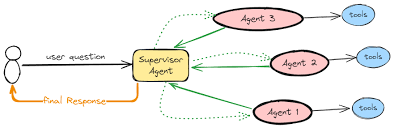

Image Credits: https://blog.futuresmart.ai/multi-agent-system-with-langgraph

**Key concepts**

**Graph:** The workflow's structure, where agents are nodes and the flow of control is defined by edges. LangGraph's StateGraph is used to build and manage this structure.

**State:** A shared object (like a TypedDict) that stores information throughout the execution of the graph, acting as a communication channel for all agents.

**Nodes:** The individual agents or tools that perform specific tasks. Each node receives the current state as input and returns an updated state.

**Edges:** The connections between nodes that define the workflow's control flow. Edges can be normal (unconditional) or conditional, allowing for dynamic routing.

**Supervisor agent:** A special agent that acts as an orchestrator, deciding which specialized agent should handle the next step based on the shared state. The supervisor is often a large language model (LLM) itself.

**Multi-agent system to research a topic and write a summary**


Multi‑Agent Orchestration with LangGraph (Supervisor pattern) + OpenAI
-----------------------------------------------------------------------------
What this script shows
- A *Supervisor* LLM routes between three specialized worker agents:
1) Researcher – breaks down tasks & drafts bullet research
2) Coder – writes runnable Python snippets or pseudo‑code
3) Writer – turns outputs into a concise, user‑ready answer
- Agents are built with LangGraph prebuilt ReAct loops and exposed as *tools*
the Supervisor can call. Conversation + results flow through a LangGraph
StateGraph.


Why this pattern?
- Clear control: Supervisor chooses which agent to call next.
- Modularity: swap agents in/out without changing the rest.
- Traceable: add LangSmith tracing easily.


In [15]:
from __future__ import annotations


from typing import Annotated, Literal, TypedDict, List
from pydantic import BaseModel, Field


# LangGraph / LangChain imports
from langgraph.graph import StateGraph, END
from langgraph.prebuilt import create_react_agent
from langgraph.checkpoint.memory import MemorySaver
from langgraph.types import Send


from langchain_openai import ChatOpenAI
from langchain_core.messages import AnyMessage, HumanMessage, SystemMessage
from langchain_core.tools import Tool

In [17]:
# -----------------------------
# 1) Define shared graph state
# -----------------------------
# We keep messages and a lightweight scratch store the agents can update.
class GraphState(TypedDict):
    messages: Annotated[List[AnyMessage], "LangGraph message channel"]
    scratch: dict


# Small helper to append to the state "messages" channel
from langgraph.graph.message import add_messages


# NOTE: When using TypedDict + channels, you can specify reducer functions.
GraphState.__annotations__["messages"] = Annotated[List[AnyMessage], add_messages]

In [19]:
# -----------------------------
# 2) Define simple built‑in tools
# -----------------------------
# These are *Python* tools that agents (via tool calling) can use.


def list_topics(text: str) -> str:
    """Return 3–7 concise bullet points (CSV) of sub‑topics from a user request."""
    # This is a trivial deterministic helper; the LLM will still lead.
    parts = [p.strip() for p in text.replace("/", " ").replace("-", " ").split()]
    uniq = []
    for p in parts:
        if p and p.lower() not in uniq:
            uniq.append(p.lower())
    # return the first few as a naive seed
    return ", ".join(uniq[:7])

def safe_eval_python(expr: str) -> str:
    """Very small, sandboxed eval for demo math/py snippets (no imports)."""
    allowed_names = {"__builtins__": {"abs": abs, "min": min, "max": max, "sum": sum}}
    try:
        result = eval(expr, allowed_names, {})
        return f"RESULT: {result!r}"
    except Exception as e:
        return f"ERROR: {e}"


list_topics_tool = Tool(
name="list_topics",
description=(
"Seed brainstorming: extract 3–7 subtopics (CSV) from a natural language prompt."
),
func=list_topics,
)

safe_eval_tool = Tool(
name="safe_eval_python",
description=(
"Run a tiny, sandboxed eval for arithmetic or short Python expressions (no imports)."
),
func=safe_eval_python,
)

In [21]:
# ------------------------------------
# 3) Initialize base model (OpenAI LLM)
# ------------------------------------
# Choose a strong thinking model for tool-use & planning. Adjust as needed.
MODEL = "gpt-4o" # You can switch to "o3"/"o3-mini" in Responses API via LangChain once supported
llm = ChatOpenAI(model=MODEL, temperature=0, api_key=OPENAI_API_KEY)

In [29]:
from langgraph.graph import MessagesState
from langchain_core.messages import SystemMessage

# 1) declare a schema that includes messages (via MessagesState) + your extras
class ResearcherState(MessagesState):
    # add any extra fields you use in the graph
    scratch: dict = {}             # your extra field
    remaining_steps: int = 5       # REQUIRED by create_react_agent

# 2) static system prompt (string or SystemMessage works)
researcher_prompt = SystemMessage(
    content=(
        "You are Researcher. Break down the task, identify missing info, "
        "and produce concise bullet research with factual tone. Use tools when helpful. "
        "Output short bullets and action items for the Coder/Writer."
    )
)


# 1) declare a schema that includes messages (via MessagesState) + your extras
class CoderState(MessagesState):
    # add any extra fields you use in the graph
    scratch: dict = {}             # your extra field
    remaining_steps: int = 5       # REQUIRED by create_react_agent

# 2) static system prompt (string or SystemMessage works)
coder_prompt = SystemMessage(
    content=(
        "You are Coder. Write minimal, correct Python or pseudo‑code to solve the subtask. "
"Prefer brevity; include only the key snippet and a one‑line explanation."
    )
)

# 1) declare a schema that includes messages (via MessagesState) + your extras
class WriterState(MessagesState):
    # add any extra fields you use in the graph
    scratch: dict = {}             # your extra field
    remaining_steps: int = 5       # REQUIRED by create_react_agent

# 2) static system prompt (string or SystemMessage works)
writer_prompt = SystemMessage(
    content=(
        "You are Writer. Synthesize the team's findings into a crisp, user‑ready answer. "
"Use headings and bullets where helpful. Keep it short and practical."
    )
)



In [63]:
# ---------------------------------------------
# 4) Create three worker agents with ReAct loops
# ---------------------------------------------
# Each agent has a focused system prompt and its own toolset.

from langgraph.checkpoint.memory import MemorySaver
from langgraph.prebuilt import create_react_agent
from langchain_core.messages import SystemMessage

checkpointer = MemorySaver()

# create the agent and pass state_schema
researcher = create_react_agent(
    llm,
    tools=[list_topics_tool],
    prompt=researcher_prompt, # or state_modifier=researcher_prompt on older versions
    name="researcher",
    state_schema=ResearcherState,  # ← crucial
    debug=True,
)




coder = create_react_agent(
llm,
tools=[safe_eval_tool],
prompt=coder_prompt,      # or state_modifier=coder_prompt on older versions
name="coder",
state_schema=CoderState,  # ← crucial
debug=True,
)


writer = create_react_agent(
llm,
tools=[],
prompt=writer_prompt,      # or state_modifier=coder_prompt on older versions
name="writer",
state_schema=WriterState,  # ← crucial
debug=True,
)



In [67]:
# ----------------------------------------------------
# 5) Build a Supervisor that routes between the agents
# ----------------------------------------------------
# We expose each worker as a *tool* the Supervisor can call. The Supervisor's
# tool-calling decision becomes the routing logic of the multi‑agent system.


from langgraph_supervisor import create_supervisor

supervisor_graph = create_supervisor(
model=llm,
agents=[researcher, coder, writer],
# Optional: constrain allowed transitions or inject routing hints here.
system_prompt=(
"You are the Supervisor. Given the conversation and scratch state, decide which "
"worker should act next: 'researcher', 'coder', or 'writer'. Call at most one "
"worker per turn; keep loops tight; finish by calling 'writer'."
),
)

# ✅ Compile supervisor (required!)
supervisor = supervisor_graph.compile(checkpointer=checkpointer)

In [40]:
# ---------------------------------
# 6) Assemble the full StateGraph
# ---------------------------------
# The Supervisor becomes our entry node. Workers are called by the supervisor
# as *tools* under the hood; we just need to provide the messages channel.


graph = StateGraph(GraphState)


# Entry: add the Supervisor as the single node — it will delegate to workers


def supervisor_node(state: GraphState):
    # The supervisor expects messages in the state. It returns updated messages.
    result = supervisor.invoke({"messages": state["messages"], "scratch": state.get("scratch", {})})
    # Merge any returned scratch updates
    new_scratch = dict(state.get("scratch", {}))
    new_scratch.update(result.get("scratch", {}))
    return {"messages": result["messages"], "scratch": new_scratch}




graph.add_node("supervisor", supervisor_node)

In [70]:
# ---------------------------------
# 7) Demo run
# ---------------------------------
if __name__ == "__main__":
    # Example user request
    user_task = (
        "Build a tiny demo that explains how multi‑agent orchestration works. "
        "Describe 5 major proven design patterns in agentic ai"
    )

    result = supervisor.invoke(
        {"messages": [HumanMessage(content=user_task)]},
        config={"configurable": {"thread_id": "demo-thread-1"}},
    )

    print("\n=== CONVERSATION ===")
    for m in result["messages"]:
        print(f"[{m.type}]\n{m.content}")

[values] {'messages': [HumanMessage(content='Build a tiny demo that explains how multi‑agent orchestration works. Include a math check 4*(5+3) and return a crisp final summary.', additional_kwargs={}, response_metadata={}, id='929bfdbd-1720-4d57-962f-1fffa9539dd0'), AIMessage(content='To build a tiny demo that explains how multi-agent orchestration works, we can consider a scenario where different agents are specialized in handling specific tasks. In this case, we have three agents: a Coder, a Writer, and a Researcher. Each agent will handle a part of the task based on their expertise.\n\n### Scenario: Multi-Agent Orchestration\n\n1. **Task Assignment**:\n   - **Coder**: Handles mathematical calculations and technical implementations.\n   - **Writer**: Crafts explanations and summaries.\n   - **Researcher**: Gathers information and verifies facts.\n\n2. **Task Execution**:\n   - **Step 1**: The Coder is tasked with performing the math check for the expression \\(4 \\times (5 + 3)\\).\n

[updates] {'agent': {'messages': [AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_MQ3qUg4HeLRqFkfToqE2r4S9', 'function': {'arguments': '{"__arg1":"major proven design patterns in agentic AI"}', 'name': 'list_topics'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 23, 'prompt_tokens': 645, 'total_tokens': 668, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-2024-08-06', 'system_fingerprint': 'fp_80956533cb', 'id': 'chatcmpl-C84Q9hfXsGssu8YyTOoDNIR92PHx3', 'service_tier': 'default', 'finish_reason': 'tool_calls', 'logprobs': None}, name='researcher', id='run--5c690b8b-70eb-4409-bf58-7a6adfbdc1ea-0', tool_calls=[{'name': 'list_topics', 'args': {'__arg1': 'major proven design patterns in agentic AI'}, 'id': 'call_MQ3qUg4HeLRqFkfToqE2r4S9', 'ty

[updates] {'agent': {'messages': [AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_ZnlxqQU8TRc4zT0RVm6OeSwz', 'function': {'arguments': '{"__arg1": "major proven design patterns in agentic AI"}', 'name': 'list_topics'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 39, 'prompt_tokens': 693, 'total_tokens': 732, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-2024-08-06', 'system_fingerprint': 'fp_80956533cb', 'id': 'chatcmpl-C84QABfj5i4yw4btuZ3Xd1LLihpma', 'service_tier': 'default', 'finish_reason': 'tool_calls', 'logprobs': None}, name='researcher', id='run--a02581ae-3978-49ec-abe3-cbd8bc549c89-0', tool_calls=[{'name': 'list_topics', 'args': {'__arg1': 'major proven design patterns in agentic AI'}, 'id': 'call_ZnlxqQU8TRc4zT0RVm6OeSwz', 't

[updates] {'agent': {'messages': [AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_bIyTf0rUDbdM2XoVekp8h2NX', 'function': {'arguments': '{"__arg1": "major proven design patterns in agentic AI"}', 'name': 'list_topics'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 39, 'prompt_tokens': 741, 'total_tokens': 780, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-2024-08-06', 'system_fingerprint': 'fp_80956533cb', 'id': 'chatcmpl-C84QBDVwW263ZqPSx3jvGatYwx2Ee', 'service_tier': 'default', 'finish_reason': 'tool_calls', 'logprobs': None}, name='researcher', id='run--515fc3f5-a298-4ad7-b49b-b3aa700629bb-0', tool_calls=[{'name': 'list_topics', 'args': {'__arg1': 'major proven design patterns in agentic AI'}, 'id': 'call_bIyTf0rUDbdM2XoVekp8h2NX', 't

[updates] {'agent': {'messages': [AIMessage(content='To build a tiny demo explaining how multi-agent orchestration works, we can focus on five major proven design patterns in agentic AI. These patterns help in structuring and managing the interactions between different agents to achieve a common goal efficiently.\n\n### Major Proven Design Patterns in Agentic AI\n\n1. **Master-Slave Pattern**:\n   - **Description**: A master agent delegates tasks to multiple slave agents. The master coordinates the overall process, while slave agents perform specific tasks.\n   - **Use Case**: Suitable for tasks that can be broken down into smaller, independent sub-tasks.\n\n2. **Broker Pattern**:\n   - **Description**: A broker agent acts as an intermediary between service providers and requesters. It manages the discovery and communication between agents.\n   - **Use Case**: Useful in dynamic environments where agents need to find and interact with each other on-the-fly.\n\n3. **Blackboard Pattern**:


=== CONVERSATION ===
[human]
Build a tiny demo that explains how multi‑agent orchestration works. Include a math check 4*(5+3) and return a crisp final summary.
[ai]
To build a tiny demo that explains how multi-agent orchestration works, we can consider a scenario where different agents are specialized in handling specific tasks. In this case, we have three agents: a Coder, a Writer, and a Researcher. Each agent will handle a part of the task based on their expertise.

### Scenario: Multi-Agent Orchestration

1. **Task Assignment**:
   - **Coder**: Handles mathematical calculations and technical implementations.
   - **Writer**: Crafts explanations and summaries.
   - **Researcher**: Gathers information and verifies facts.

2. **Task Execution**:
   - **Step 1**: The Coder is tasked with performing the math check for the expression \(4 \times (5 + 3)\).
   - **Step 2**: The Writer is responsible for explaining the process and summarizing the results.
   - **Step 3**: The Researcher en

**Visualizing Graph**

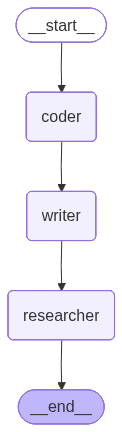

In [69]:
# ---- Imports ----
from langgraph.graph import StateGraph, START, END
from typing import TypedDict
from IPython.display import Image

# ---- Define the shared state ----
class State(TypedDict):
    topic: str
    research: str
    code: str
    article: str

# ---- Define node functions ----
def researcher(state: State) -> State:
    topic = state["topic"]
    research = f"Researched notes about {topic}"
    return {"research": research}

def coder(state: State) -> State:
    research = state["research"]
    code = f"Python code generated from research: {research[:30]}..."
    return {"code": code}

def writer(state: State) -> State:
    code = state["code"]
    research = state["research"]
    article = f"Article combining research and code.\n\nResearch: {research}\n\nCode: {code}"
    return {"article": article}

# ---- Build the graph ----
graph = StateGraph(State)

graph.add_node("researcher", researcher)
graph.add_node("coder", coder)
graph.add_node("writer", writer)

graph.add_edge(START, "coder")
graph.add_edge("coder", "writer")
graph.add_edge("writer", "researcher")
graph.add_edge("researcher", END)

# 1. Compile the graph into an app
app = graph.compile()

# 2. Visualize as PNG (best for Colab)

#display(app.get_graph().draw_mermaid_png())

# Render PNG properly
png_bytes = app.get_graph().draw_mermaid_png()
display(Image(data=png_bytes))

# 3. (Optional) Also view the Mermaid text form
#print(app.get_graph().draw_mermaid())

**What to evaluate practically for above agents that are build ?**

**Goal:** Check whether a Supervisor-routed trio (Researcher → Coder → Writer) actually collaborates to solve tasks reliably and cleanly.

**1. Core dimensions**

**Task success (objective)**

Does the final answer meet concrete requirements?

Eg: For math: exact numeric match. For code: passes unit tests. For writing: key points present.

**Role utilization (process)**

Did the flow actually use Researcher/Coder/Writer (not just a single agent)?

Were handoffs minimal (no ping-pong), and did it finish with Writer?

**Faithfulness & consistency (quality)**

Writer’s summary consistent with Researcher/Coder outputs; no hallucinated details.

**Efficiency (cost/time)**

Steps to completion (#model turns), optional token cost.

**Safety (execution & content)**

Code execution errors caught; no unsafe imports; no obviously harmful content.


**2. Scoring approach (simple + optional judge)**

Heuristics/Unit checks for objective bits (math results, code unit tests).

Process metrics from the conversation trace (steps, role usage).

Optional LLM-as-judge rubric (1–5) for clarity/faithfulness if you want a softer quality signal.

**Most Popular Agentic AI design Patterns**

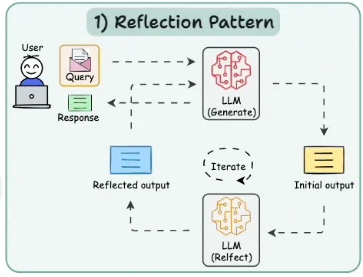

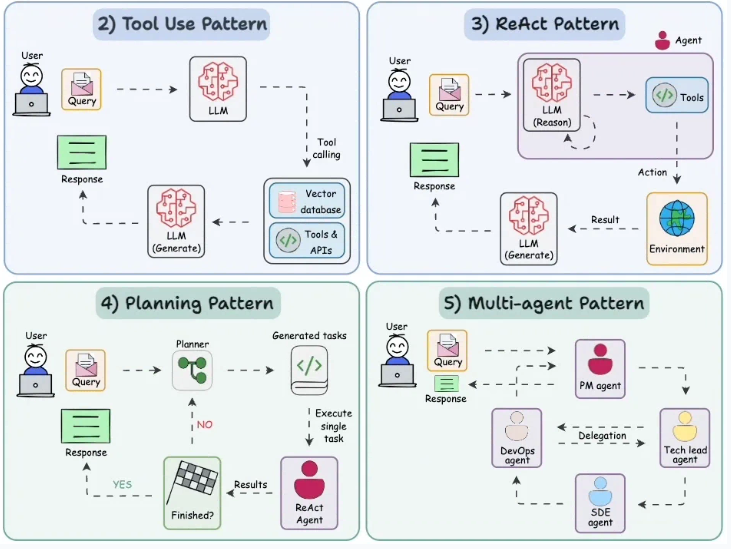

Image credits: https://blog.dailydoseofds.com/p/5-agentic-ai-design-patterns